DORNA

In [13]:
import numpy as np
dorna = np.load(f'ENT_clean_DORNA.npy',allow_pickle=True)

In [14]:
dorna[4]

{'sent1': 'مورد دیگری که باید ببینید ، فیلم خوابیدن با دشمن است.',
 'sent2': 'باید خوابیدن با دشمن را ببینی.',
 'label': 'e',
 'response': 'perspective'}

In [15]:
dorna_true_labels = []
dorna_predicted_lebels = []
for item in dorna:
    dorna_true_labels.append(item['label'])
    dorna_predicted_lebels.append(item['response'])

In [16]:
for index,item in enumerate(dorna_true_labels):

    if 'e' in item:
        item = 'entails'
    elif 'c' in item:
        item = 'Contradiction'
    else:
        item = 'OTHER'

    dorna_true_labels[index] = item
# np.save(f'SA_clean_LLAMA3.npy', np.array(clean_data, dtype=object))

In [17]:
unique_values= np.unique(dorna_true_labels, return_inverse=True)
unique_values

(array(['Contradiction', 'OTHER', 'entails'], dtype='<U13'),
 array([0, 1, 1, ..., 1, 1, 2], dtype=int64))

In [18]:
for index,item in enumerate(dorna_predicted_lebels):

    if 'perspective' in item:
        item = 'entails'
    elif 'Contradiction' in item:
        item = 'Contradiction'
    else:
        item = 'OTHER'

    dorna_predicted_lebels[index] = item
# np.save(f'SA_clean_LLAMA3.npy', np.array(clean_data, dtype=object))

In [19]:
unique_values= np.unique(dorna_predicted_lebels, return_inverse=True)
unique_values

(array(['Contradiction', 'OTHER', 'entails'], dtype='<U13'),
 array([2, 2, 2, ..., 2, 0, 0], dtype=int64))

In [20]:
from sklearn.metrics import f1_score

# Calculate Macro F1-score
macro_f1 = f1_score(dorna_true_labels, dorna_predicted_lebels, average='macro')

print(f'Macro F1-score: {macro_f1}')

Macro F1-score: 0.4905200682866586


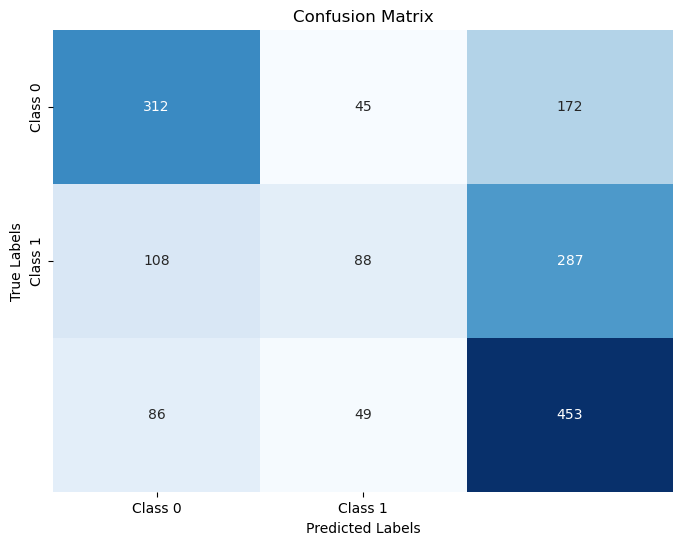

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(dorna_true_labels, dorna_predicted_lebels)

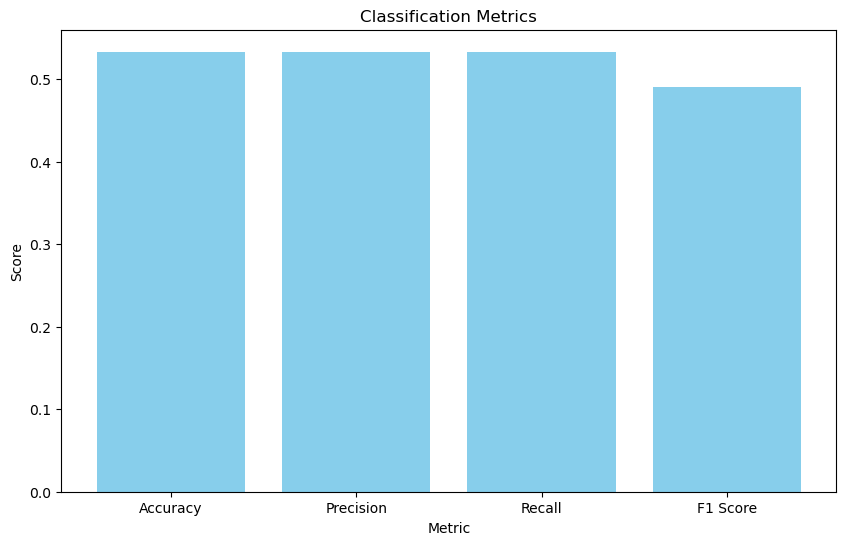

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score, 
    precision_recall_fscore_support
)

def plot_classification_metrics(metrics):
    categories = list(metrics.keys())
    scores = list(metrics.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, scores, color='skyblue')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title('Classification Metrics')
    plt.show()

# Example metrics
metrics = {
    'Accuracy': accuracy_score(dorna_true_labels, dorna_predicted_lebels),
    'Precision': precision_score(dorna_true_labels, dorna_predicted_lebels, average='weighted'),
    'Recall': recall_score(dorna_true_labels, dorna_predicted_lebels, average='weighted'),
    'F1 Score': f1_score(dorna_true_labels, dorna_predicted_lebels, average='macro')
}

plot_classification_metrics(metrics)

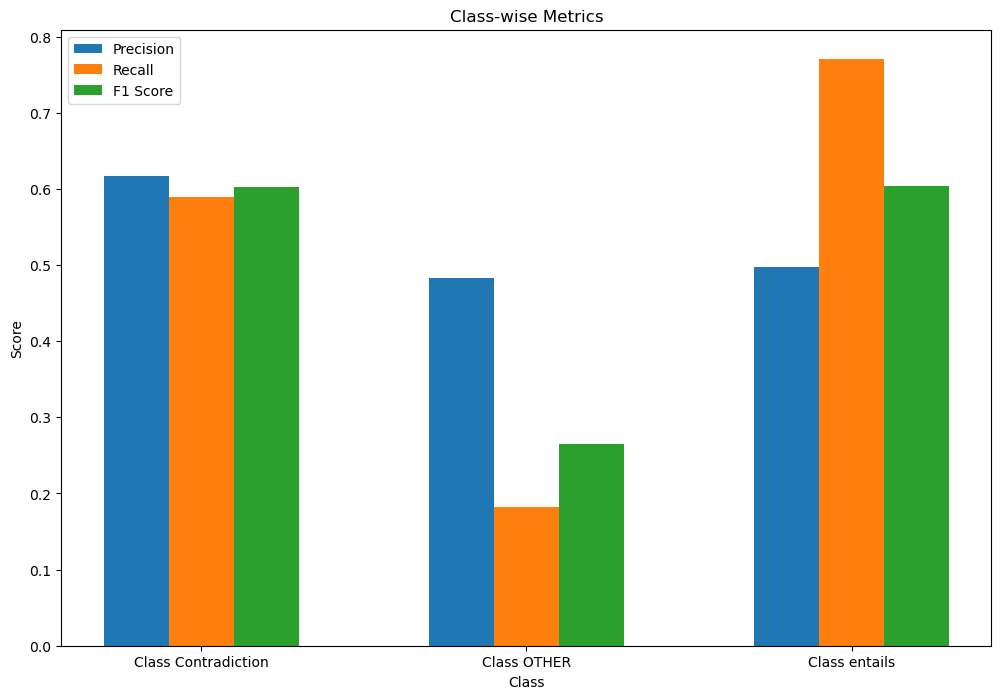

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Sample data (replace these with your true and predicted labels)
true_labels = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])
predicted_labels = np.array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

# Class-wise Metrics Comparison
def plot_class_wise_metrics(true_labels, predicted_labels):
    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None, labels=np.unique(true_labels))
    classes = [f'Class {i}' for i in np.unique(true_labels)]

    # Plot metrics
    plt.figure(figsize=(12, 8))
    x = np.arange(len(classes))
    width = 0.2
    
    # Plot Precision
    plt.bar(x - width, precision, width, label='Precision')
    
    # Plot Recall
    plt.bar(x, recall, width, label='Recall')
    
    # Plot F1 Score
    plt.bar(x + width, f1, width, label='F1 Score')

    # Add labels and title
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title('Class-wise Metrics')
    plt.xticks(x, classes)
    plt.legend()
    plt.show()

# Call the function with sample data
plot_class_wise_metrics(dorna_true_labels, dorna_predicted_lebels)


LLAMA3

In [60]:
import numpy as np
llama = np.load(f'ENT_clean_LLAMA3.npy',allow_pickle=True)

llama_true_labels = []
llama_predicted_lebels = []
for item in llama:
    llama_true_labels.append(item['label'])
    llama_predicted_lebels.append(item['response'])

In [61]:
for index,item in enumerate(llama_true_labels):

    if 'e' in item:
        item = 'entails'
    elif 'c' in item:
        item = 'Contradiction'
    else:
        item = 'OTHER'

    llama_true_labels[index] = item

In [62]:
unique_values= np.unique(llama_true_labels, return_inverse=True)
unique_values

(array(['Contradiction', 'OTHER', 'entails'], dtype='<U13'),
 array([0, 1, 1, ..., 1, 0, 1], dtype=int64))

In [63]:
for index,item in enumerate(llama_predicted_lebels):

    if 'perspective' in item:
        item = 'entails'
    elif 'Contradiction' in item:
        item = 'Contradiction'
    else:
        item = 'OTHER'

    llama_predicted_lebels[index] = item
# np.save(f'SA_clean_LLAMA3.npy', np.array(clean_data, dtype=object))

In [64]:
unique_values= np.unique(llama_predicted_lebels, return_inverse=True)
unique_values

(array(['Contradiction', 'OTHER', 'entails'], dtype='<U13'),
 array([2, 2, 1, ..., 2, 2, 0], dtype=int64))

In [65]:
from sklearn.metrics import f1_score

# Calculate Macro F1-score
macro_f1 = f1_score(llama_true_labels, llama_predicted_lebels, average='macro')

print(f'Macro F1-score: {macro_f1}')

Macro F1-score: 0.47926076439342863


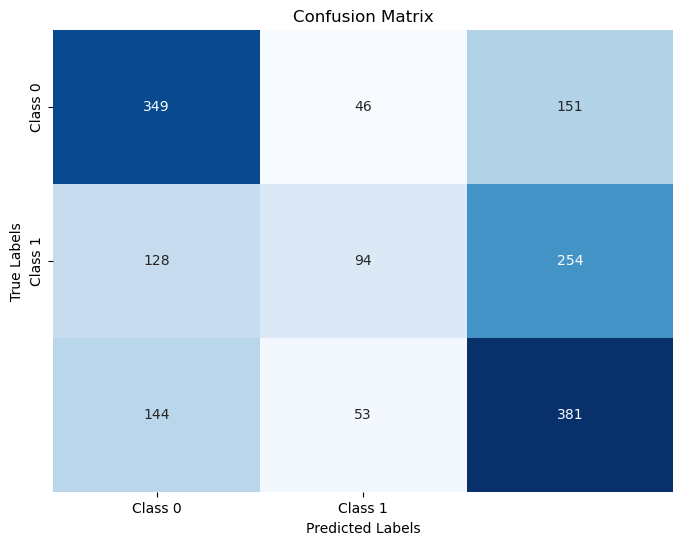

In [66]:
plot_confusion_matrix(llama_true_labels, llama_predicted_lebels)

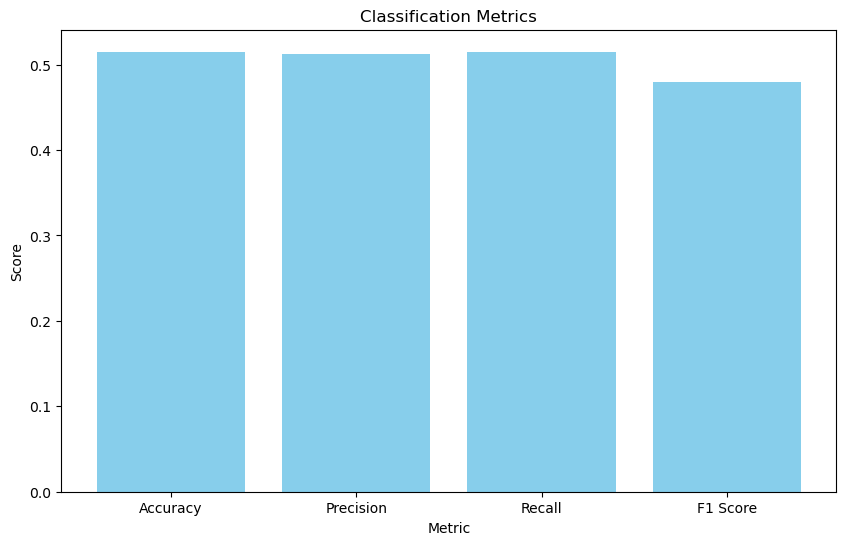

In [35]:
metrics = {
    'Accuracy': accuracy_score(llama_true_labels, llama_predicted_lebels),
    'Precision': precision_score(llama_true_labels, llama_predicted_lebels, average='weighted'),
    'Recall': recall_score(llama_true_labels, llama_predicted_lebels, average='weighted'),
    'F1 Score': f1_score(llama_true_labels, llama_predicted_lebels, average='macro')
}
plot_classification_metrics(metrics)

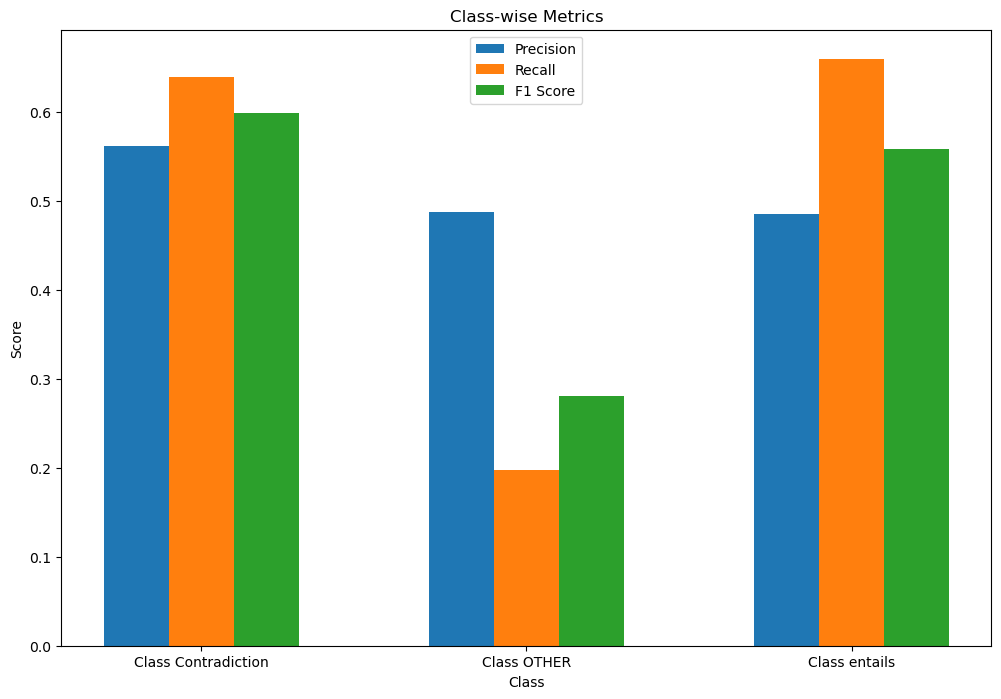

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Sample data (replace these with your true and predicted labels)
true_labels = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])
predicted_labels = np.array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

# Class-wise Metrics Comparison
def plot_class_wise_metrics(true_labels, predicted_labels):
    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None, labels=np.unique(true_labels))
    classes = [f'Class {i}' for i in np.unique(true_labels)]

    # Plot metrics
    plt.figure(figsize=(12, 8))
    x = np.arange(len(classes))
    width = 0.2
    
    # Plot Precision
    plt.bar(x - width, precision, width, label='Precision')
    
    # Plot Recall
    plt.bar(x, recall, width, label='Recall')
    
    # Plot F1 Score
    plt.bar(x + width, f1, width, label='F1 Score')

    # Add labels and title
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title('Class-wise Metrics')
    plt.xticks(x, classes)
    plt.legend()
    plt.show()

# Call the function with sample data
plot_class_wise_metrics(llama_true_labels, llama_predicted_lebels)
